In [86]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import statistics


#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

# Homework 2

**1.** The probability for getting two ones will be $\frac{1}{6} * \frac{1}{6} = \frac{1}{36}$. And the probability for getting a sum of 7 will be $\frac{6}{36} = \frac{1}{6}$, since there are 6 possible combinations that makes up a sum of 7 ( [1, 6], [2, 5], [3, 4], [4, 3], [5, 2], [6, 1]) out of 36 combinations. Therefore, rolling sevens is more probable. The ratio of the probabilities is $\frac{1}{36} / \frac{6}{36} = \frac{1}{6} $

**2.** The distribution of the sum of two dices can be given by $X_1 \ast X_2$, where the $\ast$ is called the convolution operator. The possible values of the sum of two six sided dice will be all the integers between 2 and 12 inclusively. First, we will calculate the probability mass funciton of the sum by counting the possibilities of every values. We know there will be 36 possible combinations of the values of the two dices.

For sum of 2, there is only one combination for the two dices:(1, 1). $P(2) = \frac{1}{36}$

For sum of 3, there are two combinations:(1, 2) and (2, 1). $P(3) = \frac{2}{36} = \frac{1}{18}$

3 combinations for sum of 4:(1,3), (2,2), (3, 1). $P(4) = \frac{3}{36} = \frac{1}{12}$

4 combinations for sum of 5:(1,4), (2,3), (3,2), (4,1).$P(5) = \frac{4}{36} = \frac{1}{9}$

5 combinations for sum of 6:(1,5), (2,4), (3,3), (4,2),(5,1). $P(6) = \frac{5}{36}$

6 combinations for sum of 7:(1,6), (2,5), (3,4), (4,3), (5,2), (6,1). $P(7) = \frac{6}{36} = \frac{1}{6}$

5 combinations for sum of 8:(2,6), (3,5), (4,4), (5,3),(6,1). $P(8) = \frac{5}{36}$

...$P(9) = \frac{1}{9}, P(10) = \frac{1}{12}, P(11) = \frac{1}{18}, P(12) = \frac{1}{36}$

Let's draw it out on the graph

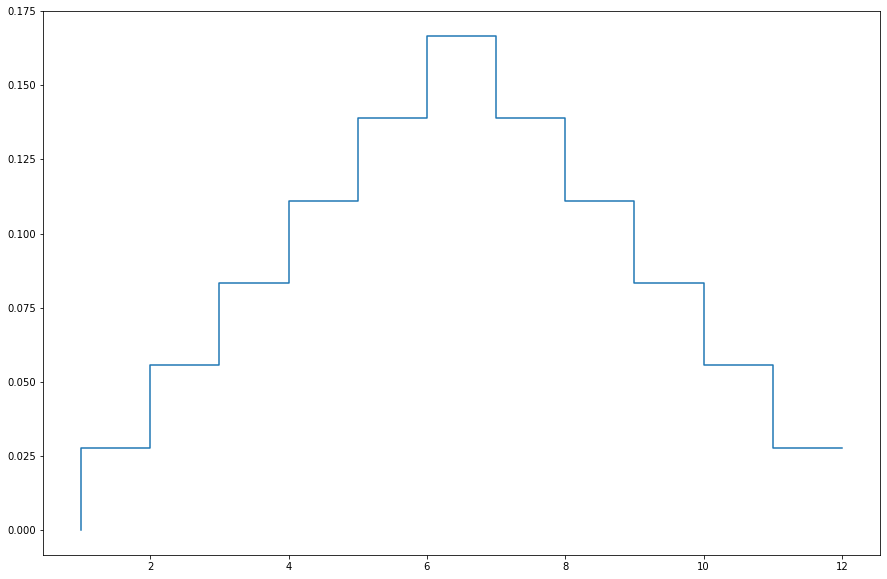

In [45]:
x = list(range(12))
x = [x_value + 1 for x_value in x]
P = [0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36] 
P_norm =[P_value / sum(P) for P_value in P]
plt.step(x, P_norm)
plt.show()

**3.** Next, let's calculate the mean and variance of this distribution.

We calculate the mean by calculating the weighted average of all the possible values. We use np.average() function.

In [46]:
weighted_avg = np.average(x, weights=P)
weighted_avg

6.999999999999997

The mean we got is 7.(The output from python is not exactly 7, and it's very likly due to the flotaing points)

We then calculate the variance by using equation $var(X) = E[X^2] - E[X]^2 $

In [47]:
x_squared = [x_value **2 for x_value in x]
squared_mean = np.average(x_squared, weights = P)
squared_mean

54.83333333333332

In [48]:
var = squared_mean - (weighted_avg)**2
var

5.833333333333357

The variance turns out to be $\frac{35}{6}$

**4.** Now we look for the distirbution of the sum of ten dices. We can use np.convolve() command in Python(We convolve only 9 times to add up ten distirbutions).

In [49]:
p1 = [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6];
p2 = [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6];

for x in range(9):
    p2 = np.convolve(p1, p2, 'full')


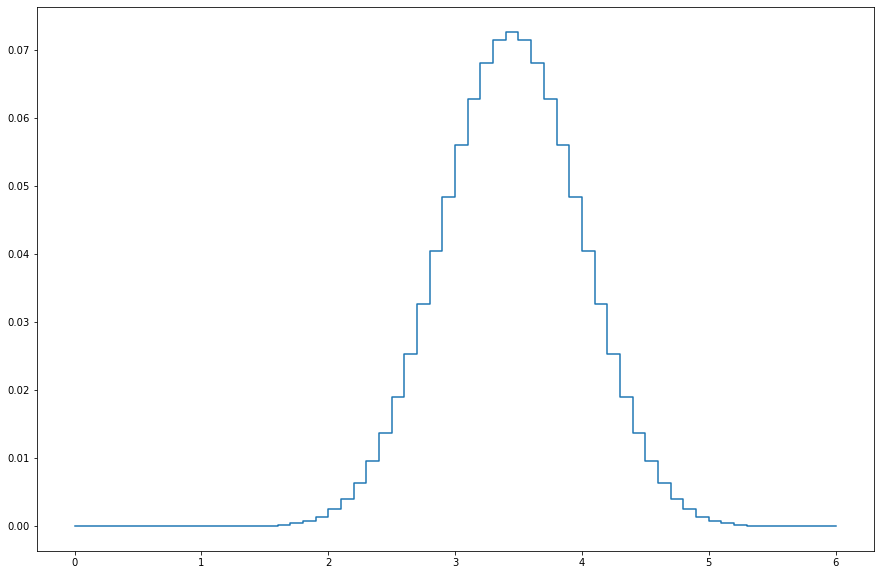

In [50]:
x = list(range(len(p2)))
x = [x_value for x_value in x]
x = [x_value / 10 for x_value in x] #recale x-axis to find the average
plt.step(x, p2)
plt.show()

The graph looks like a Gaussian function. We can draw the semilog plot of the distribution. If the result turns out to be a parabola, we can say the distribution is similar to a Gaussain distribution.

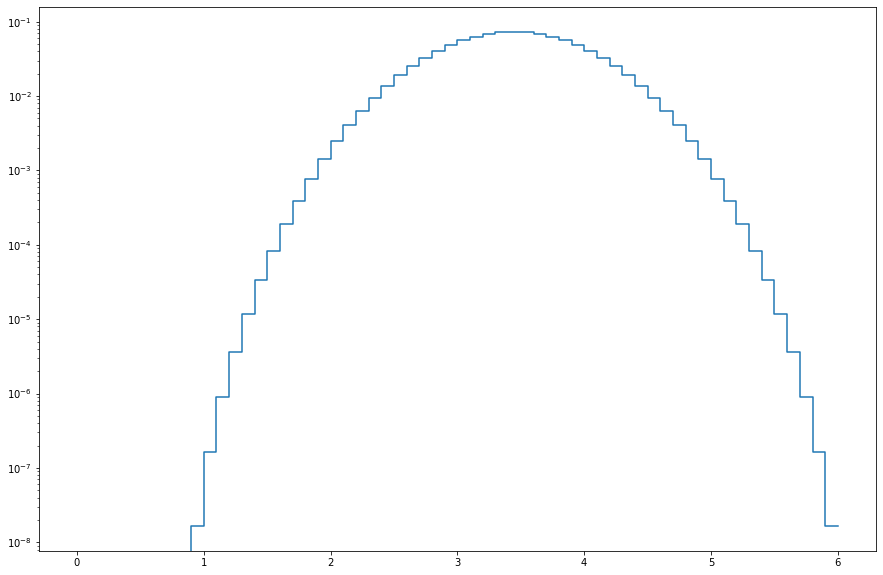

In [51]:
plt.yscale('log')
plt.step(x, p2)
plt.show()

It looks parabolic! The distribution of the sum of ten dices follows a Gaussian distribution.

**5.** A gaussian distribution follows the equation: $f(x) = \frac{1}{{\sigma \sqrt {2\pi }}}e^\frac{{{{ - \left( {x - \mu } \right)^2 }}}}{2\sigma ^2}$. We will use convolve() on the discretized version of gaussian

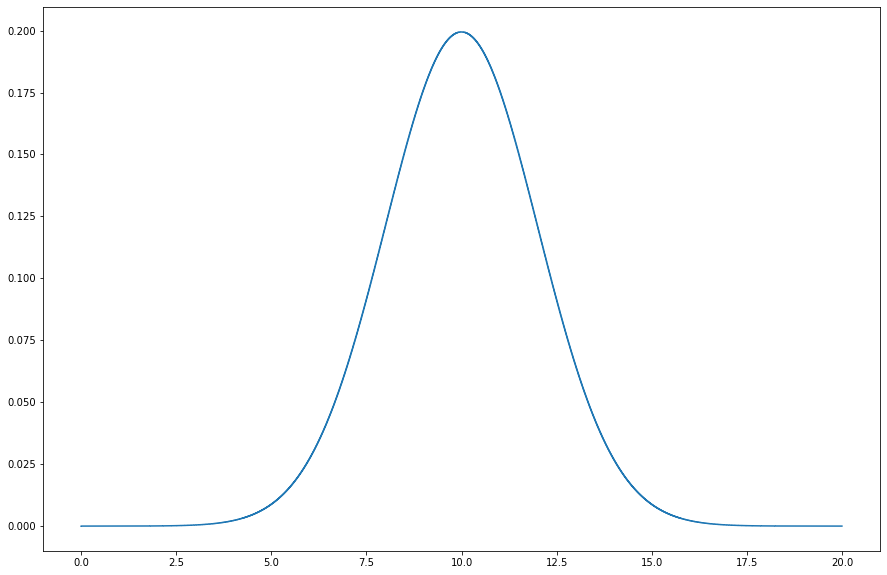

In [80]:
resolution = 1/100;
xmax = 20;
xmin = 0;
x = np.arange(xmin, xmax, resolution);
sigma = 2 #set sigma value
mu = 10 #set mean value
gaussian = 1 / (sigma* math.sqrt(2 *math.pi))*np.exp(-((x - mu)/sigma)**2/2)
plt.step(x , gaussian)
plt.show()

Now we do convolution on two of the same gaussian distributions.

In [81]:
convolved_gaussian = np.convolve(gaussian, gaussian, 'full')


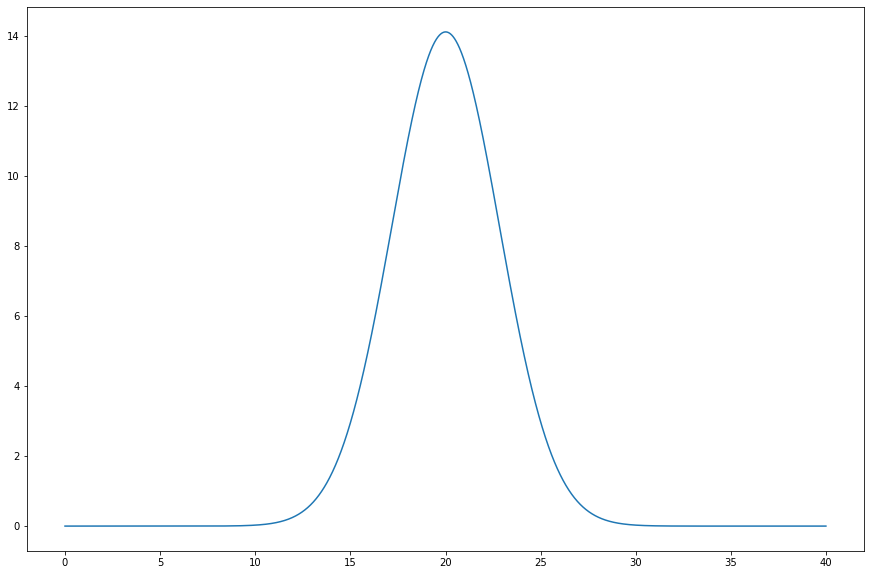

In [82]:
x = np.arange(xmin * 2, xmax * 2, resolution);
x = x[:-1] #make the dimension the same as the convolution
plt.plot(x, convolved_gaussian)
plt.show()

It looks like a Gaussian. Now let's try semilog

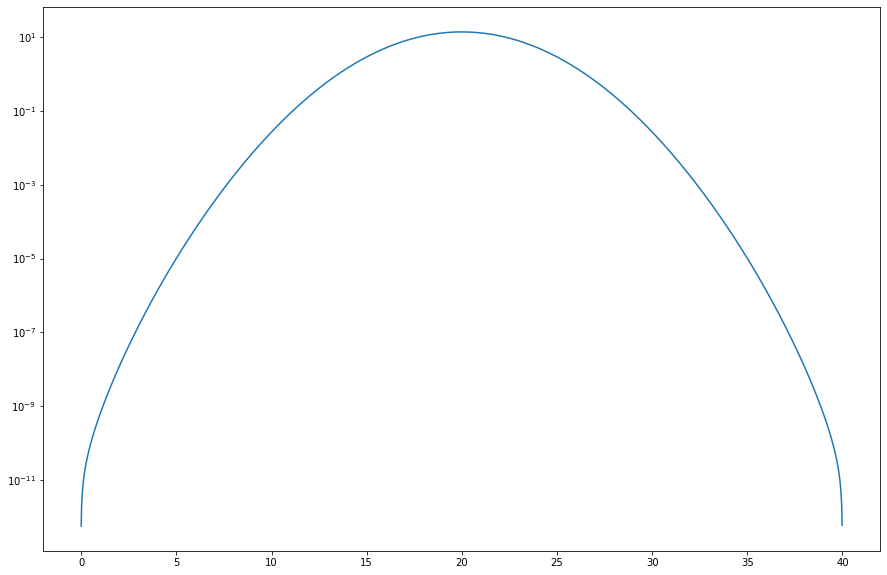

In [83]:
plt.yscale('log')
plt.plot(x, convolved_gaussian)
plt.show()

The sum of the convolution gives us another Gaussian distribution! We now plot the average of the convolution, by rescaling the x-axis.

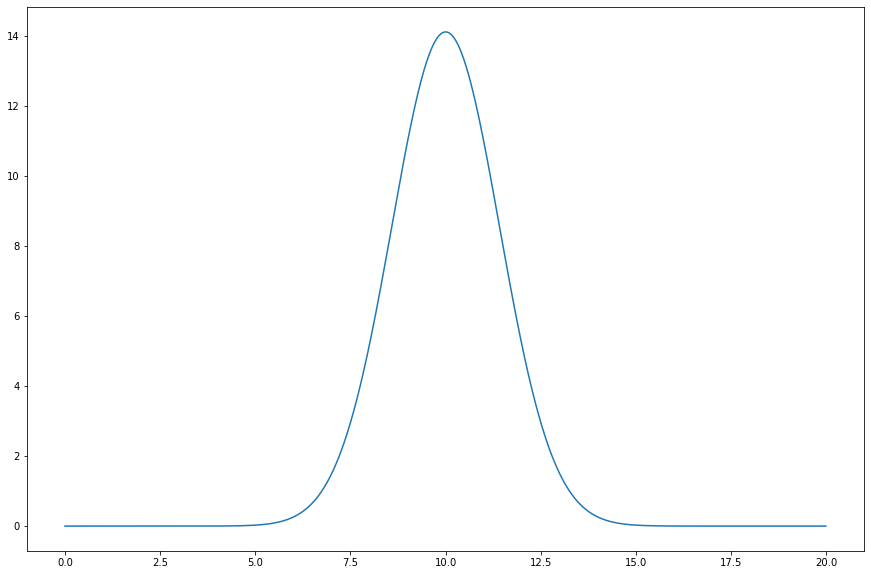

In [84]:
x = np.arange(xmin, xmax, resolution / 2); #rescaling.
x = x[:-1]
plt.plot(x, convolved_gaussian)
plt.show()

Obviously, the new gaussian distribution is centered at 10.

In [88]:
statistics.variance(convolved_gaussian)

18.691689041422286

And the result for variance we had is 18.691. In fact, without deviation, the variance was supposed to be 16, which is the sum of variance of the two gaussians being convolved together